In [1]:
%run ./modulo_modifica.ipynb

In [2]:
path="/home/andry/Andrea/repo/PlaSim-analysis/"
name_simulation="NSM2_100_70_30_ML_SI_T21/"
path_lat_lon=path+name_simulation+"output/NSM2_PLA.0001.nc"
inpt="{:.7E}\t"

In [3]:
resolution=name_simulation.split("_")[-1].replace("/","")
if resolution=="T21":
    nlat=32
    nlon=64
    tot=2048
    row1=512
    #col1=4
    row2=256
    #col2=8
    mul=1
else :
    nlat=64
    nlon=128
    tot=8192
    row1=2048
    #col1=8
    row2=1024
    mul=2

In [4]:
#load of latitude and longitude from a file PLA from the simulation
nc_fid = Dataset(path_lat_lon,'r') 
lats = nc_fid.variables['lat'][:]
lons= nc_fid.variables['lon'][:]
month=["Dec0","Jan","Feb","Mar","Apr","May","Jun","Jul","Aug","Sep","Oct","Nov","Dec","Jan13"]
g=9.80665

# File Input #

## Maximum Soil Water Holding Capacity ##

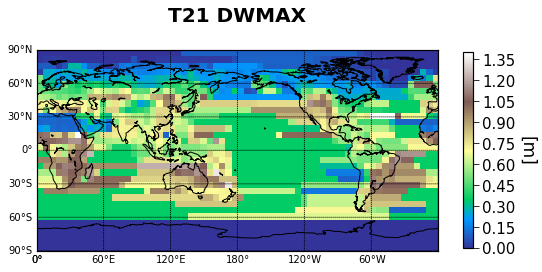

In [5]:
data229,str229=read_graph_file("N0"+str(nlat)+"_surf_0229.sra",path+name_simulation,\
                               False,resolution+" DWMAX",month,4,'[m]',\
                               0,1.4,plt.cm.get_cmap("terrain"))

## Surface Geopotential Orography ##

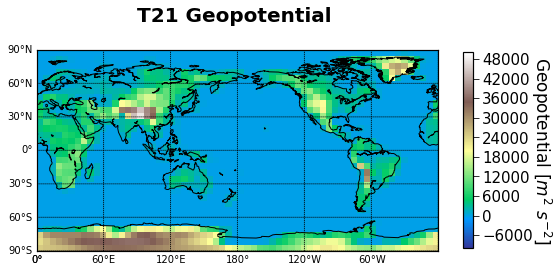

In [6]:
data129,str129=read_graph_file("N0"+str(nlat)+"_surf_0129.sra",path+name_simulation,False,\
                               resolution+" Geopotential ",month,None,\
                               r'Geopotential [$m ^2~s ^{-2}]$',\
                               -10000,50000,plt.cm.get_cmap("terrain"))

## Orography ##

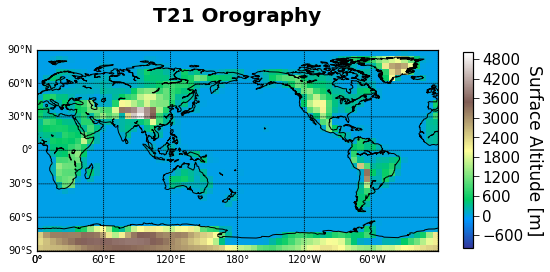

In [7]:
graphycs_v(data129[::-1]/9.81,resolution+" Orography","cyl",\
           plt.cm.get_cmap("terrain"),True,\
           "Surface Altitude [m]",-1000,5000)

## Surface Temperature Accumulated ##

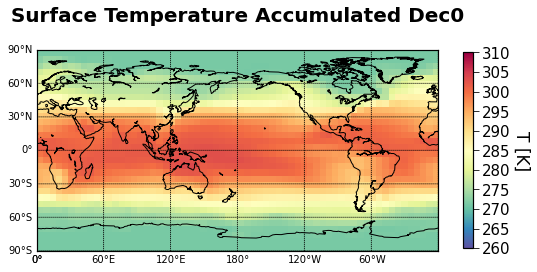

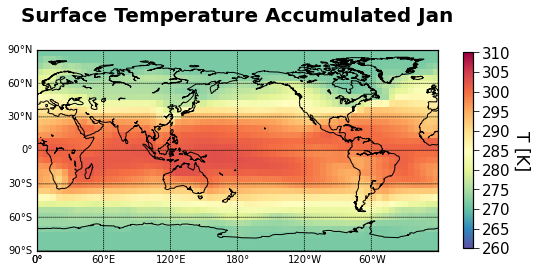

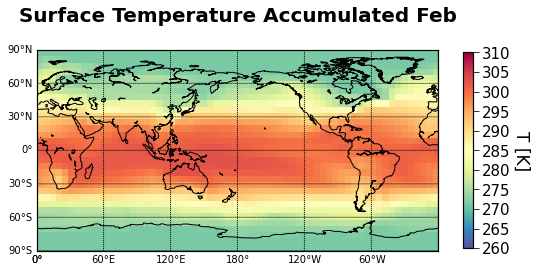

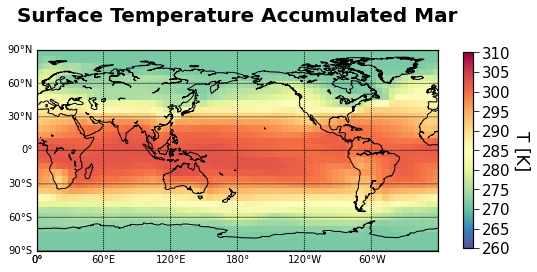

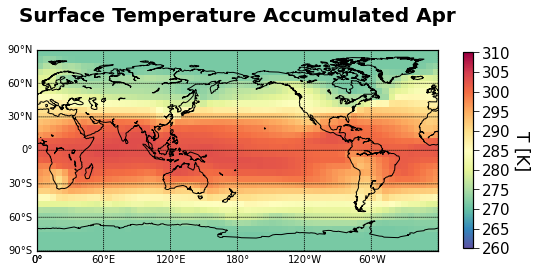

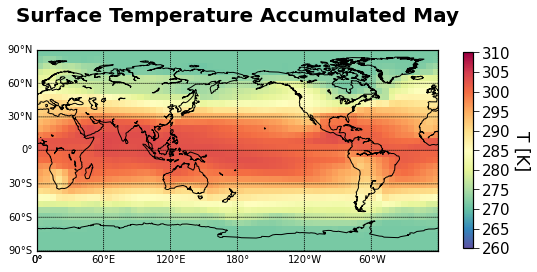

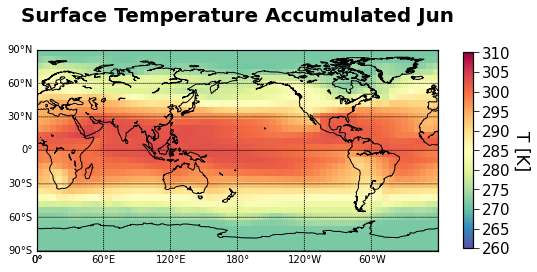

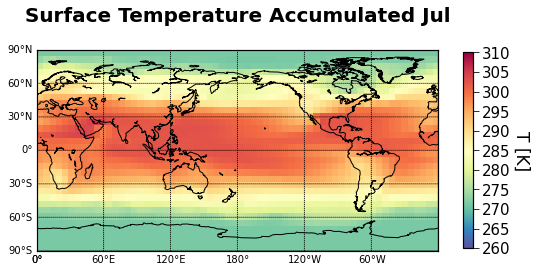

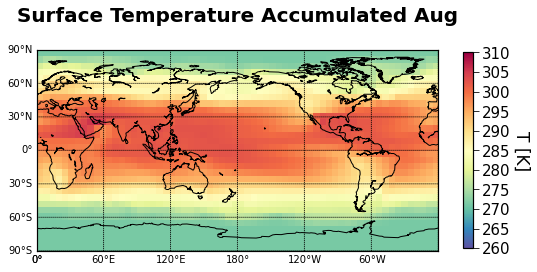

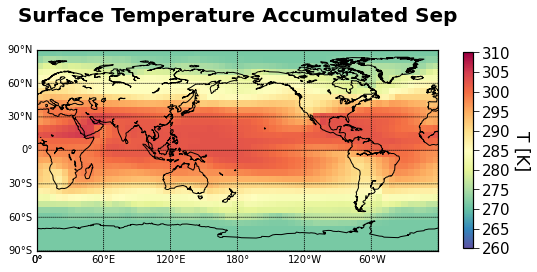

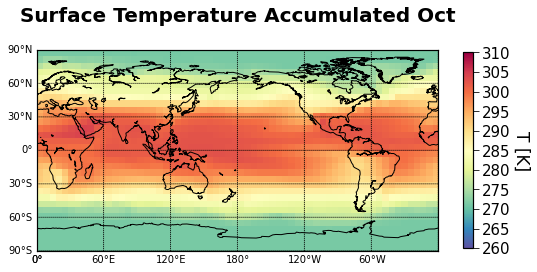

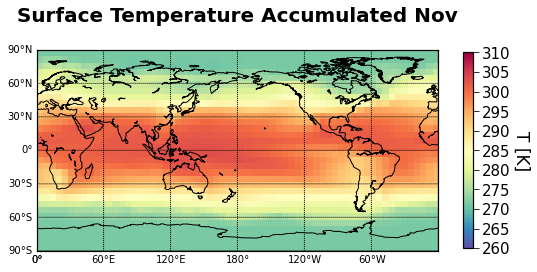

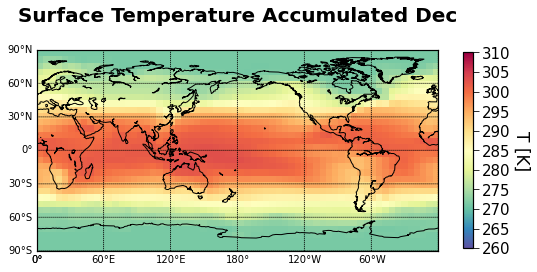

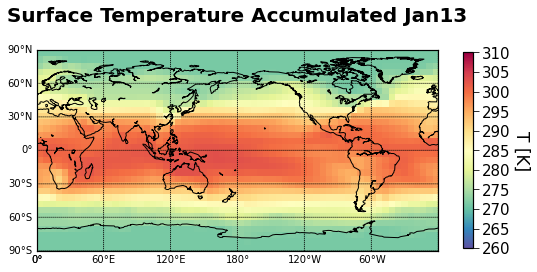

In [8]:
data169,str169=read_graph_file("N0"+str(nlat)+"_surf_0169.sra",\
                               path+name_simulation,True,"Surface Temperature Accumulated",\
                               month,8,'T [K]',260,310,plt.cm.get_cmap("Spectral_r"))

## Land Sea Mask ##

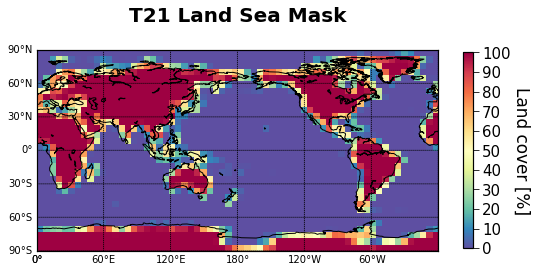

In [9]:
data172,str172=read_graph_file("N0"+str(nlat)+"_surf_0172.sra",path+name_simulation,\
                               False,resolution+" Land Sea Mask",month,None,\
                               'Land cover [%]',0,100,plt.cm.get_cmap("Spectral_r"),const=100)


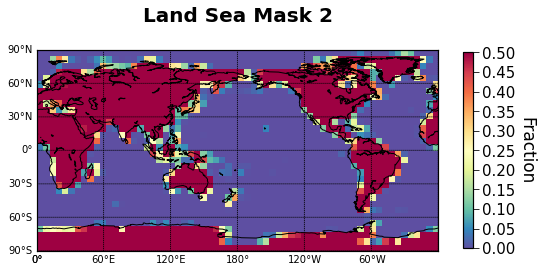

In [10]:
data172,str172=read_graph_file("N0"+str(nlat)+"_surf_0172.sra",path+name_simulation,\
                               False,"Land Sea Mask 2",month,None,'Fraction',\
                               0,0.5,plt.cm.get_cmap("Spectral_r"))


## Roughness Lenght ##

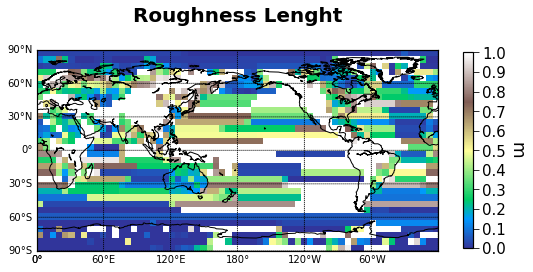

In [11]:
data173,str173=read_graph_file("N0"+str(nlat)+"_surf_0173.sra",path+name_simulation,\
                               False,"Roughness Lenght",month,None,'m',0,1,\
                               plt.cm.get_cmap("terrain"))

## Albedo ##

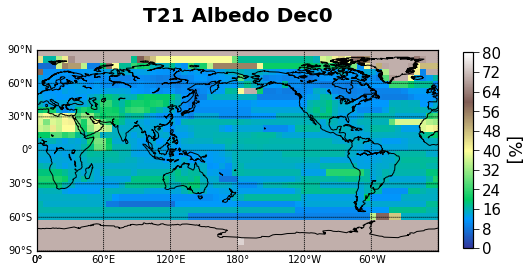

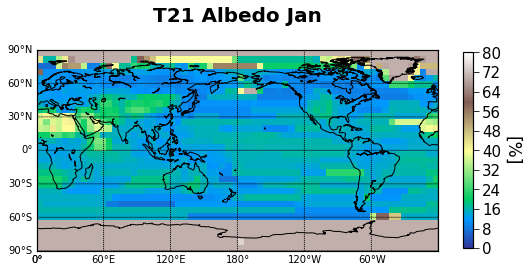

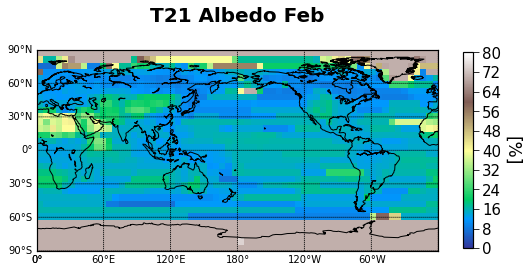

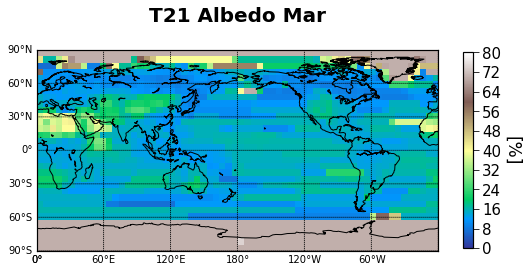

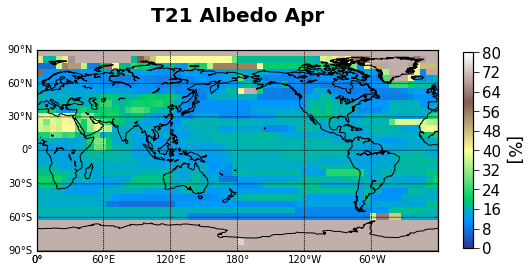

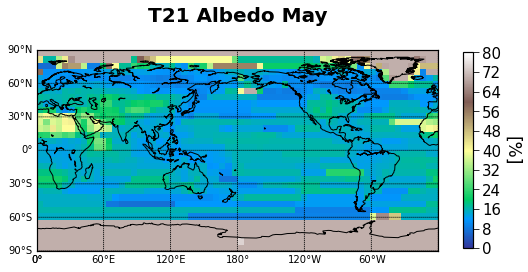

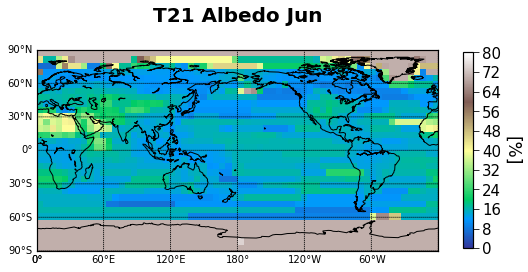

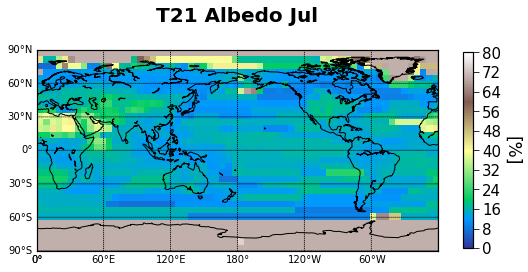

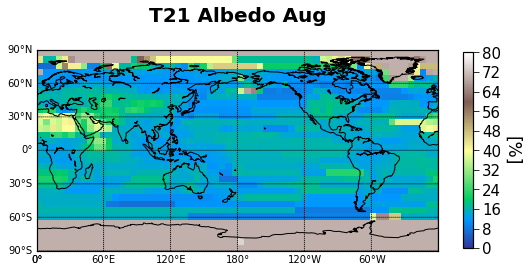

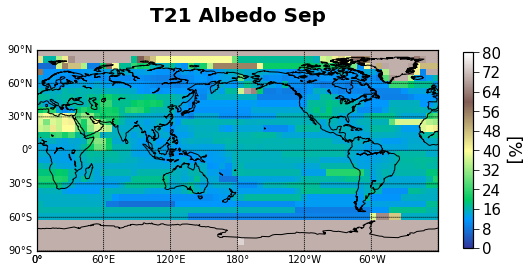

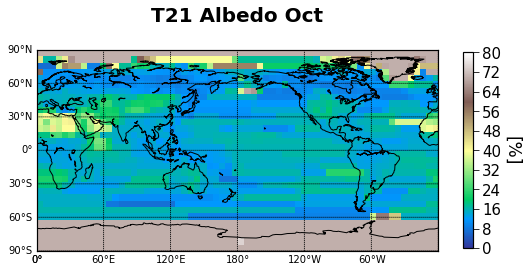

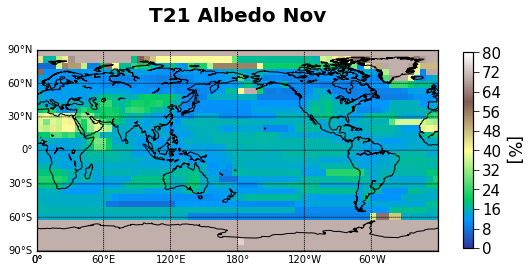

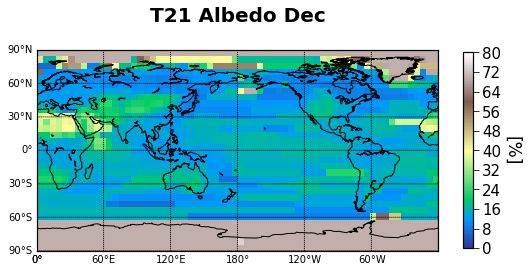

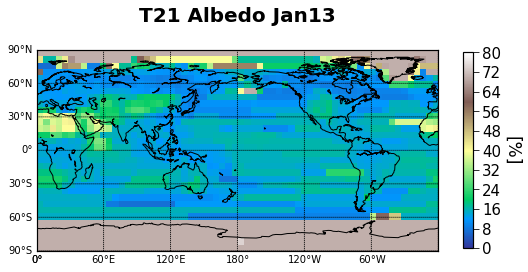

In [12]:
data174,str174=read_graph_file("N0"+str(nlat)+"_surf_0174.sra",path+name_simulation,True,\
                               resolution+" Albedo",month,4,'[%]',0,80,\
                               plt.cm.get_cmap("terrain"),const=100)

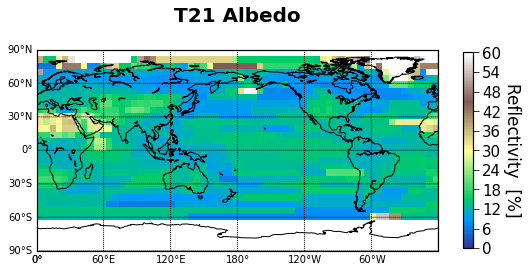

In [13]:
mean("N0"+str(nlat)+"_surf_0174.sra",path+name_simulation,4,resolution+" Albedo",0,60,\
     "Reflectivity  [%]",plt.cm.get_cmap("terrain"),const=100)

## Leaf Area Index ##

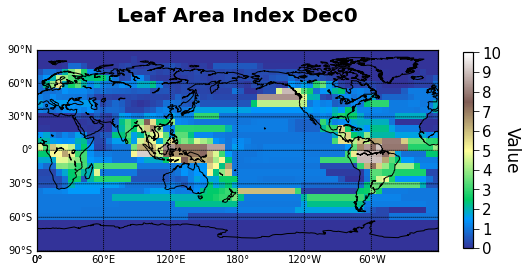

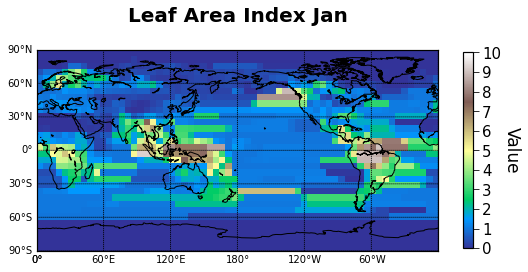

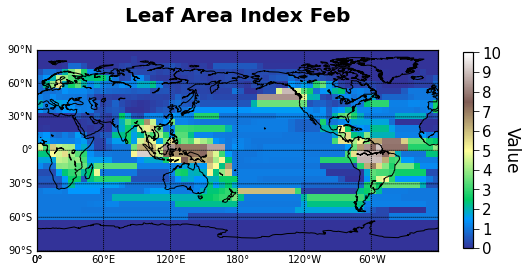

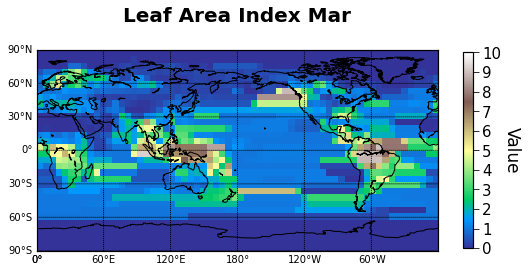

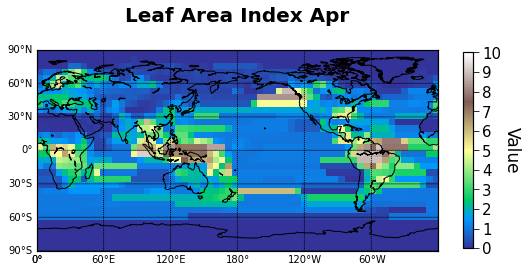

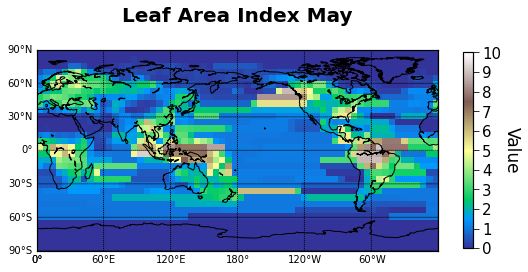

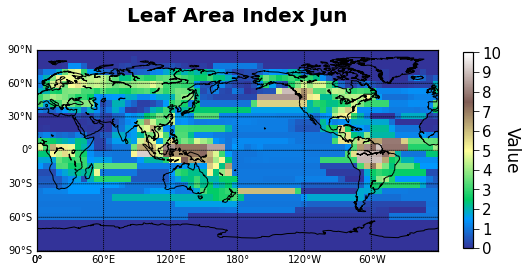

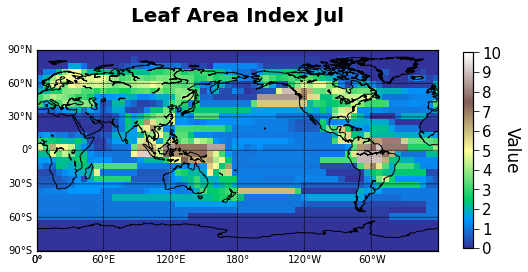

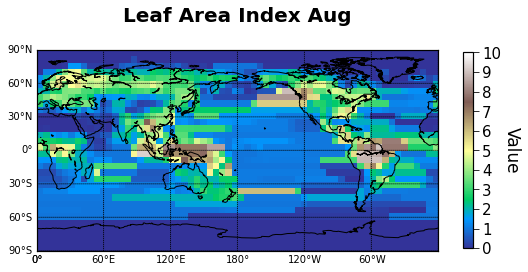

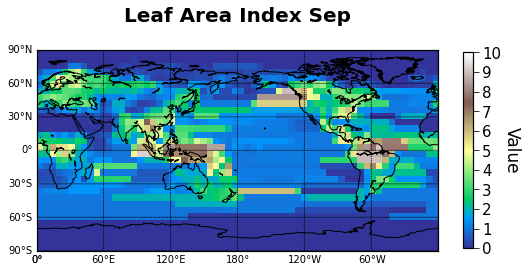

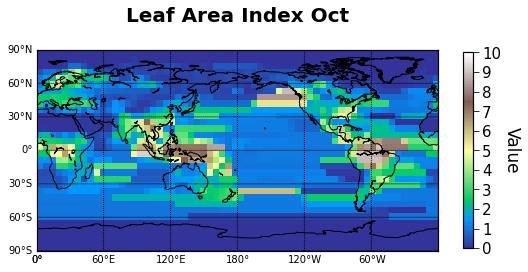

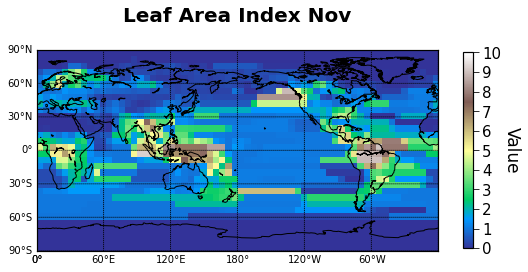

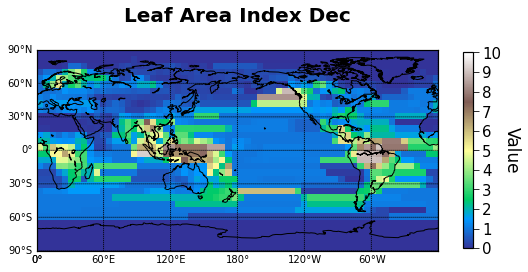

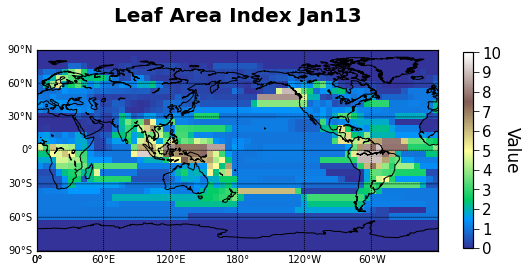

In [14]:
data200,str200=read_graph_file("N0"+str(nlat)+"_surf_0200.sra",path+name_simulation,True,\
                               "Leaf Area Index",month,4,'Value',0,10,plt.cm.get_cmap("terrain"))

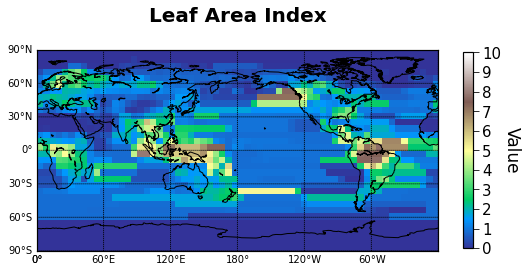

In [15]:
mean("N0"+str(nlat)+"_surf_0200.sra",path+name_simulation,4,\
     "Leaf Area Index",0,10,"Value",plt.cm.get_cmap("terrain"))

## Sea Ice Cover ##

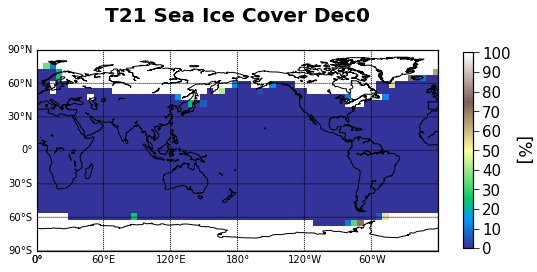

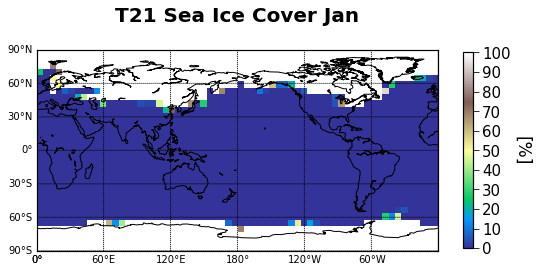

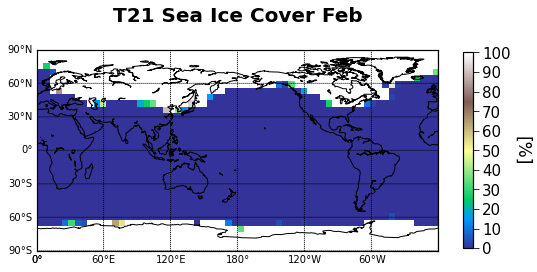

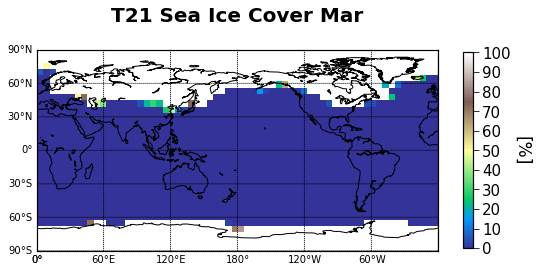

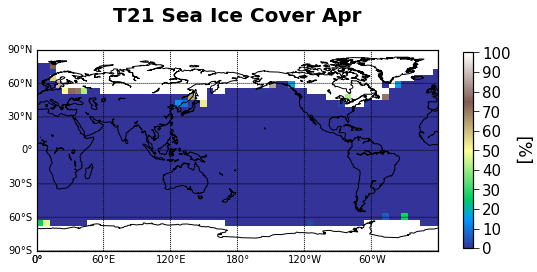

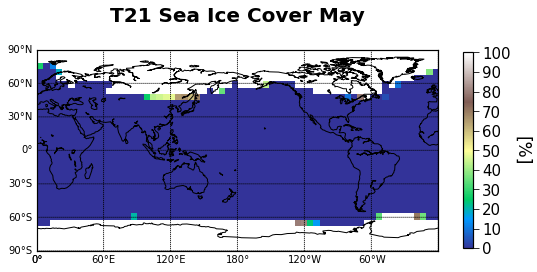

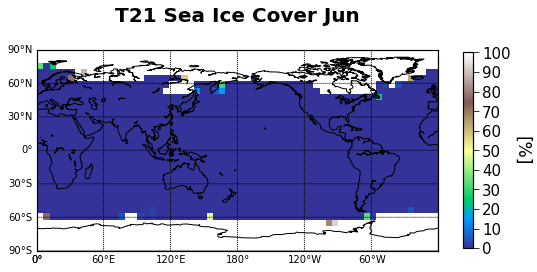

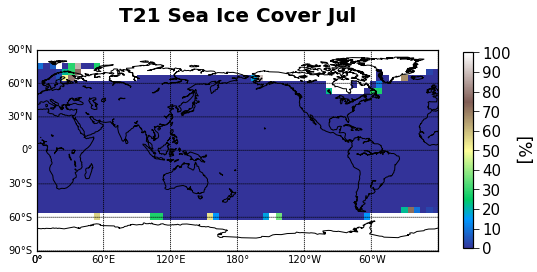

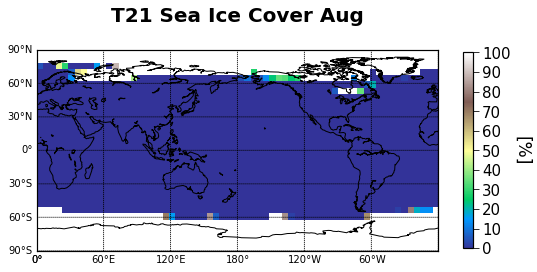

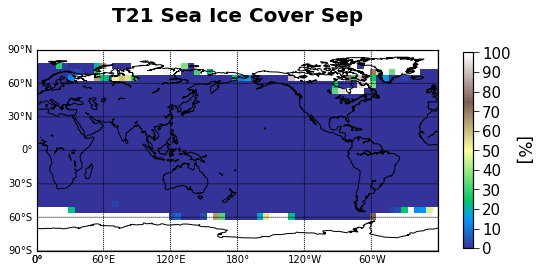

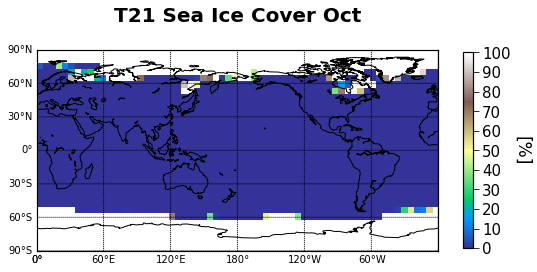

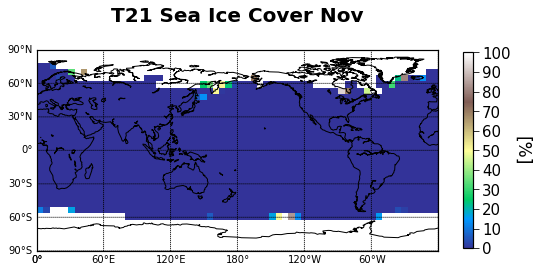

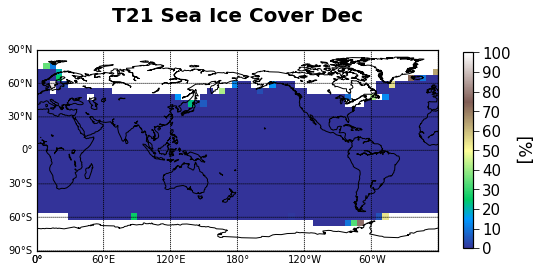

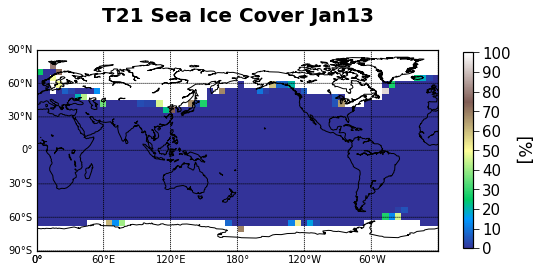

In [16]:
data210,str210=read_graph_file("N0"+str(nlat)+"_surf_0210.sra",path+name_simulation,True,\
                               resolution+" Sea Ice Cover",month,8,'[%]',\
                               0,100,plt.cm.get_cmap("terrain"),const=100)

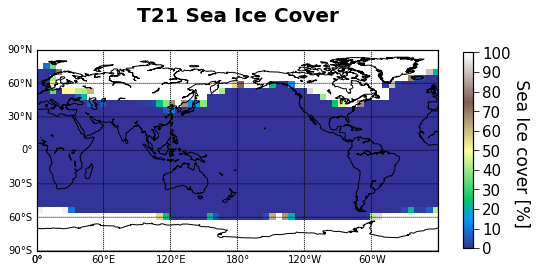

In [17]:
mean("N0"+str(nlat)+"_surf_0210.sra",path+name_simulation,8,\
     resolution+" Sea Ice Cover",0,100," Sea Ice cover [%]",\
     plt.cm.get_cmap("terrain"),const=100)

## Forest Cover ##

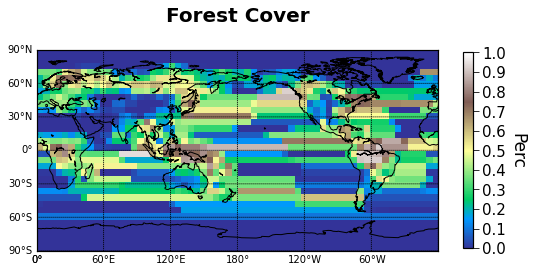

In [18]:
data212,str212=read_graph_file("N0"+str(nlat)+"_surf_0212.sra",path+name_simulation,\
                               False,"Forest Cover",month,4,'Perc',0,1,plt.cm.get_cmap("terrain"))

## Glacier Mask ##

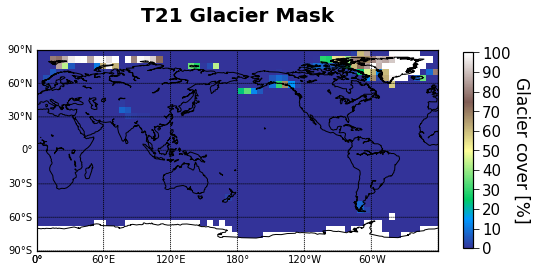

In [19]:
data232,str232=read_graph_file("N0"+str(nlat)+"_surf_0232.sra",path+name_simulation,\
                               False,resolution+" Glacier Mask",month,4,'Glacier cover [%]'\
                               ,0,100,plt.cm.get_cmap("terrain"),const=100)


# Input Mask Modification#

## Remove ice sheets and glaciers ##

In [20]:
data232_mod=np.zeros((row1,4))

with open(path+name_simulation+"N0"+str(nlat)+"_surf_0232_mod.sra","w") as f:
    f.write(str232)
    for i in range(0,len(data232_mod)):
        for j in range(0,len(data232_mod[i])):
            f.write(inpt.format(data232_mod[i][j]))
        f.write("\n")

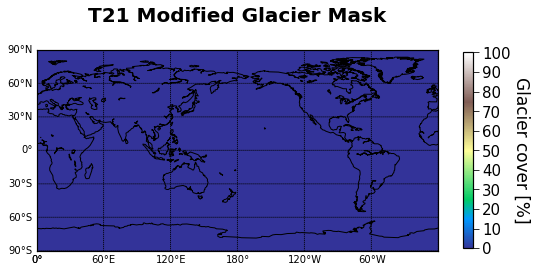

In [21]:
_=read_graph_file("N0"+str(nlat)+"_surf_0232_mod.sra",path+name_simulation,\
                  False,resolution+" Modified Glacier Mask",month,4,\
                  'Glacier cover [%]',0,100,plt.cm.get_cmap("terrain"),const=100)

## Remove Sea Ice Cover ##

In [22]:
data210_res_mod=np.zeros((row2,8))

with open(path+name_simulation+"N0"+str(nlat)+"_surf_0210_mod.sra",'w'):
    print("riscrivo file")
for i in range(0,int(len(data210)*8/tot)):
    with open(path+name_simulation+"N0"+str(nlat)+"_surf_0210_mod.sra",'a+') as f1:
        f1.write(str210)
        for k in range(0,len(data210_res_mod)):
            for j in range(0,len(data210_res_mod[k])):
                f1.write(inpt.format(data210_res_mod[k][j]))
            f1.write("\n")

riscrivo file


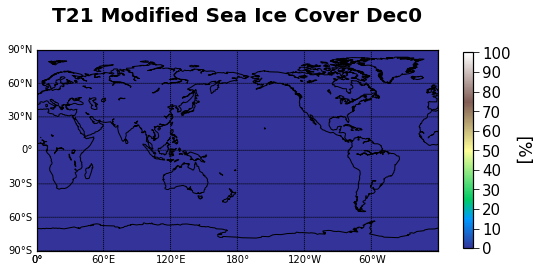

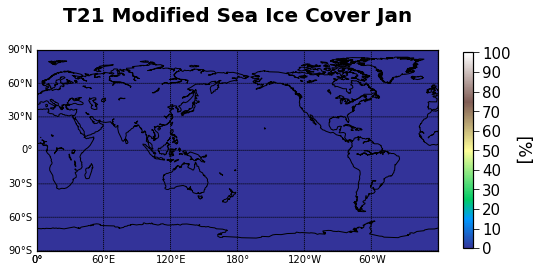

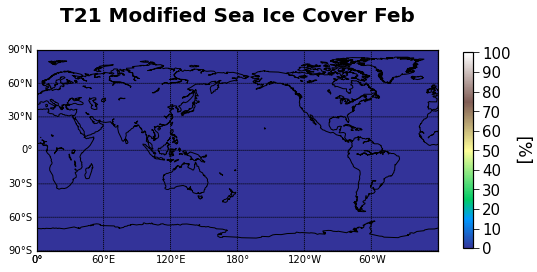

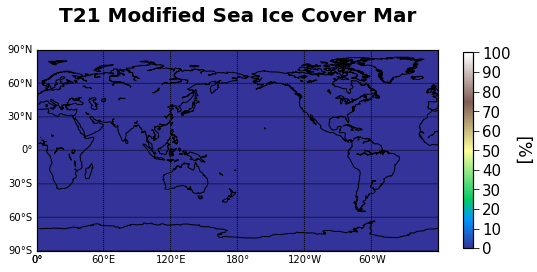

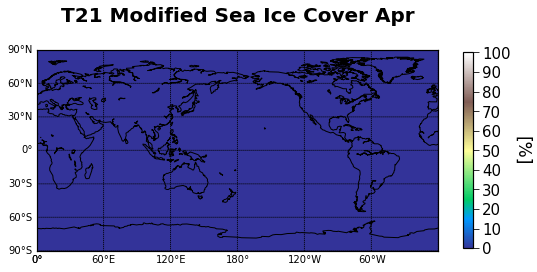

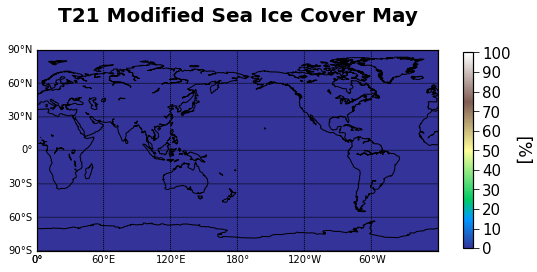

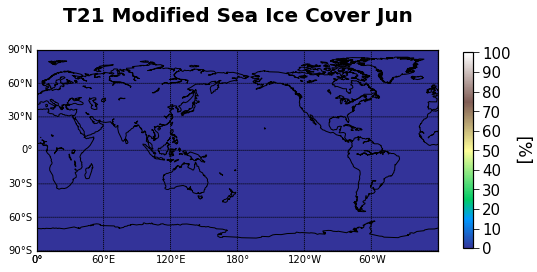

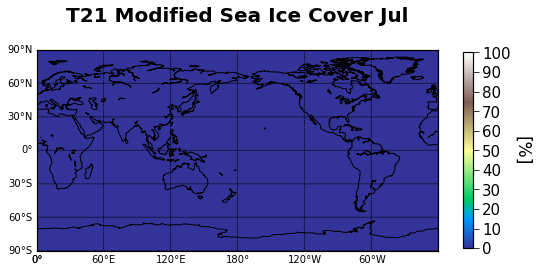

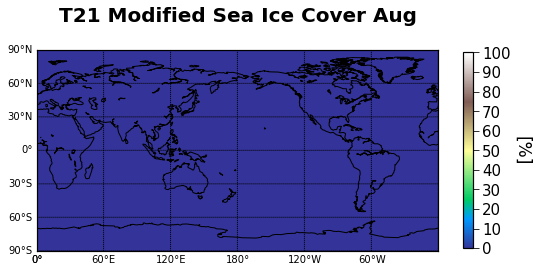

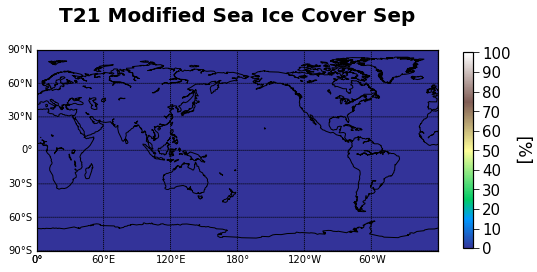

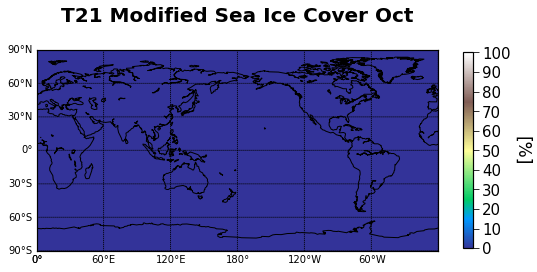

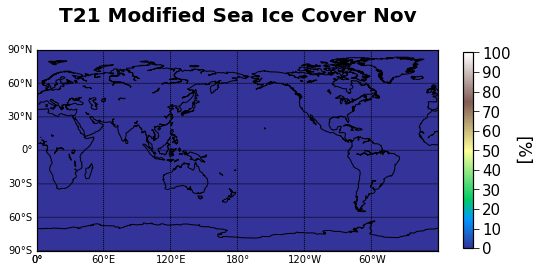

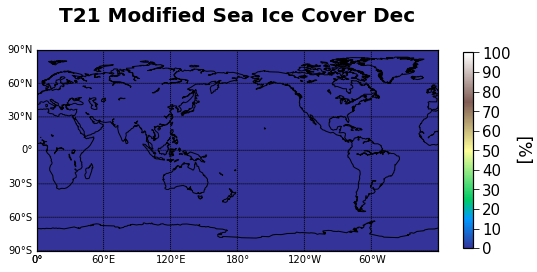

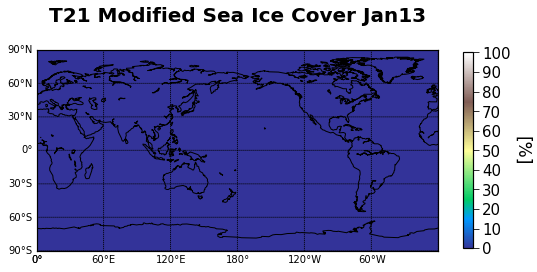

In [23]:
_=read_graph_file("N0"+str(nlat)+"_surf_0210_mod.sra",path+name_simulation,True,\
                               resolution+" Modified Sea Ice Cover",month,8,'[%]',\
                               0,100,plt.cm.get_cmap("terrain"),const=100)

##  Water Holding Capacity Modification (over the ice sheets and glaciers)##

1.47559 0.001


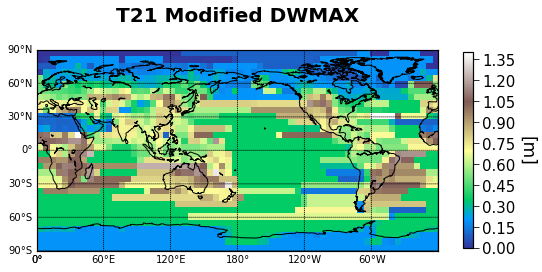

In [24]:
data229_mod=np.zeros(np.shape(data229))

for i in range(0,len(data229)):
    for j in range(0,len(data229[i])):
        if data232[i][j]>0.05:
            data229_mod[i][j]=0.2
        else:
            data229_mod[i][j]=data229[i][j]
        if i>26*mul:
            if data172[i][j]<0.5:
                data229_mod[i][j]=0.35*(1-data172[i][j])

print(np.max(data229_mod),np.min(data229_mod))
graphycs_v(data229_mod[::-1],resolution+" Modified DWMAX",'cyl',plt.cm.get_cmap("terrain"),True,"[m]",0,1.4)


data229_mod_1=np.reshape(data229_mod,[row1,4])
with open(path+name_simulation+"N0"+str(nlat)+"_surf_0229_mod1.sra","w") as f:
    f.write(str229)
    for i in range(0,len(data229_mod_1)):
        for j in range(0,len(data229_mod_1[i])):
            f.write(inpt.format(data229_mod_1[i][j]))
        f.write("\n")

## Water Holding Capacity Modification (from 60 N) ##

1.47559 0.0


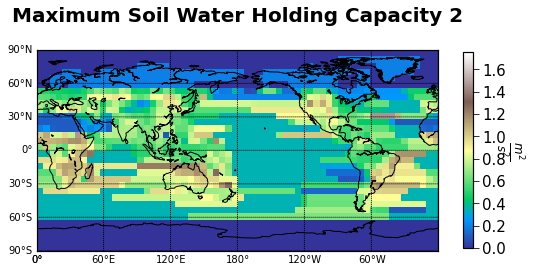

In [25]:
data229_mod2=np.zeros(np.shape(data229))

for i in range(0,len(data229)):
    for j in range(0,len(data229[i])):
        if i<6*mul:
            if data172[i][j]>=0.5:
                data229_mod2[i][j]=0.2
        else:
            data229_mod2[i][j]=data229[i][j]
print(np.max(data229_mod2),np.min(data229_mod2))
graphycs_v(data229_mod2[::-1],"Maximum Soil Water Holding Capacity 2",'cyl',\
           plt.cm.get_cmap("terrain"),True,r'$\frac{m ^2}{s ^2}$',0,1.75)


data229_mod_2=np.reshape(data229_mod2,[row1,4])
with open(path+name_simulation+"N0"+str(nlat)+"_surf_0229_mod2.sra","w") as f:
    f.write(str229)
    for i in range(0,len(data229_mod_2)):
        for j in range(0,len(data229_mod_2[i])):
            f.write(inpt.format(data229_mod_2[i][j]))
        f.write("\n")

## Water Holding Capacity Modification (All) ##

0.5 0.5


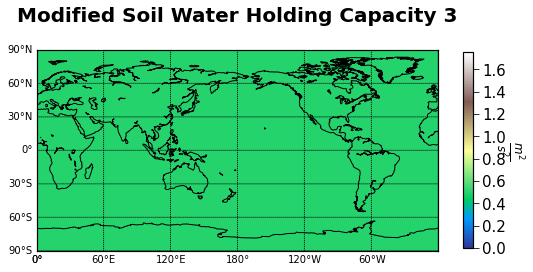

In [26]:
data229_mod3=np.zeros(np.shape(data229))

for i in range(0,len(data229)):
    for j in range(0,len(data229[i])):
        data229_mod3[i][j]=0.5
print(np.max(data229_mod3),np.min(data229_mod3))
graphycs_v(data229_mod3[::-1],"Modified Soil Water Holding Capacity 3",'cyl',\
           plt.cm.get_cmap("terrain"),True,r'$\frac{m ^2}{s ^2}$',0,1.75)


data229_mod_3=np.reshape(data229_mod3,[row1,4])
with open(path+name_simulation+"N0"+str(nlat)+"_surf_0229_mod3.sra","w") as f:
    f.write(str229)
    for i in range(0,len(data229_mod_3)):
        for j in range(0,len(data229_mod_3[i])):
            f.write(inpt.format(data229_mod_3[i][j]))
        f.write("\n")

## Surface Geopotential Orography Modification ##

47697.551 0.0


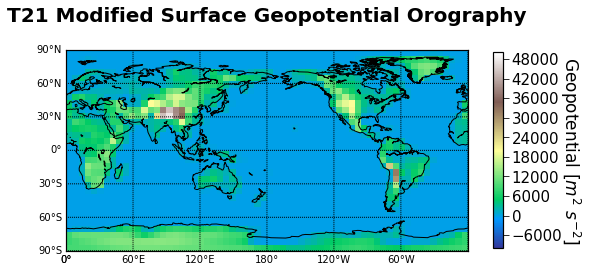

In [27]:
data129_mod=np.zeros(np.shape(data129))

for i in range(0,len(data129)):
    for j in range(0,len(data129[i])):
        if i<5*mul and j>45*mul:
            z=424
        elif i>26*mul:
            z=87
        else :
            z=0
        if data232[i][j]>0.05:
            data129_mod[i][j]=(data129[i][j]-data172[i][j]*z*g)*0.917/2.7+z*g*data172[i][j]
        else:
            data129_mod[i][j]=data129[i][j]
print(np.max(data129_mod),np.min(data129_mod))
graphycs_v(data129_mod[::-1],resolution+" Modified Surface Geopotential Orography",'cyl',\
           plt.cm.get_cmap("terrain"),True,r'Geopotential [$m ^2~s^{-2}$]',-10000,50000)


data129_mod_2=np.reshape(data129_mod,[row2,8])
with open(path+name_simulation+"N0"+str(nlat)+"_surf_0129_mod.sra","w") as f:
    f.write(str129)
    for i in range(0,len(data129_mod_2)):
        for j in range(0,len(data129_mod_2[i])):
            f.write(inpt.format(data129_mod_2[i][j]))
        f.write("\n")


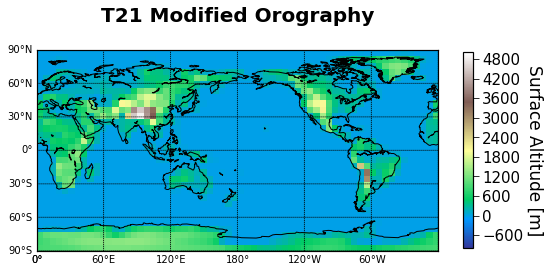

In [28]:
graphycs_v(data129_mod[::-1]/9.81,resolution+" Modified Orography","cyl",\
           plt.cm.get_cmap("terrain"),True,"Surface Altitude [m]",-1000,5000)

## Albedo Modification ##

riscrivo file


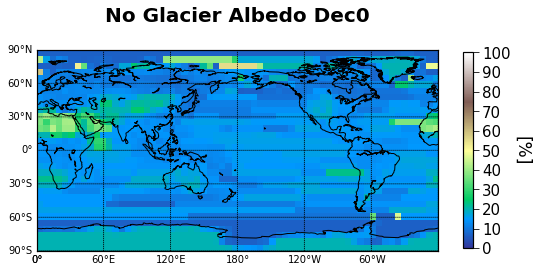

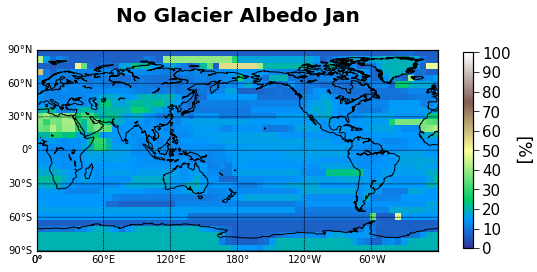

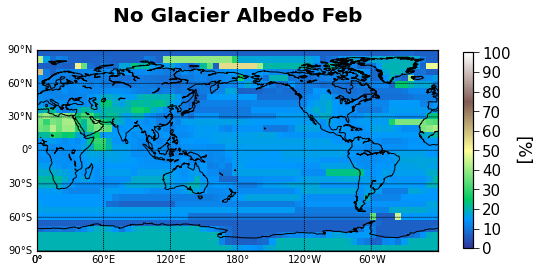

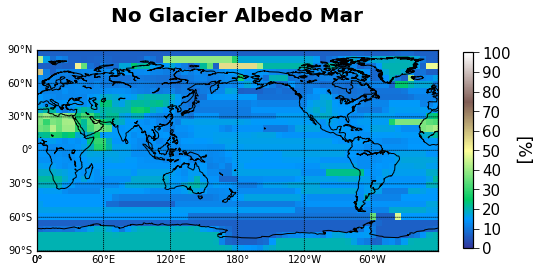

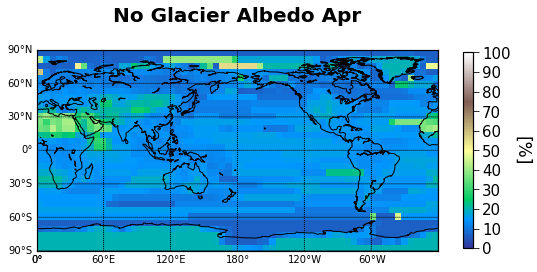

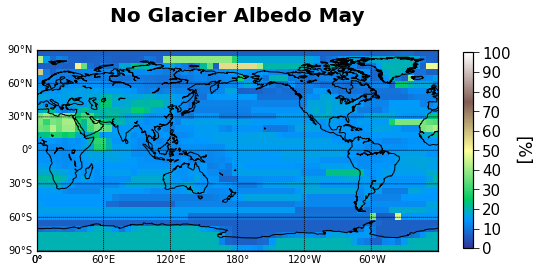

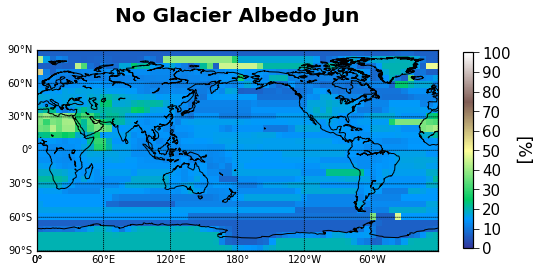

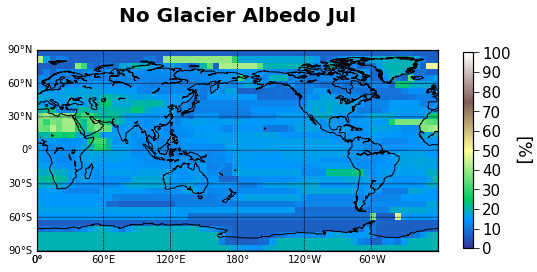

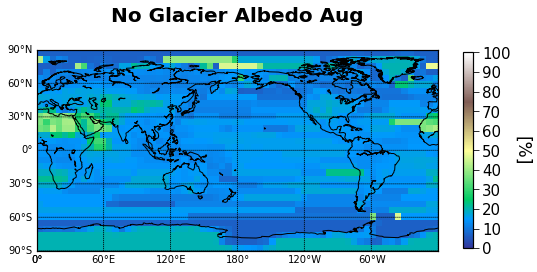

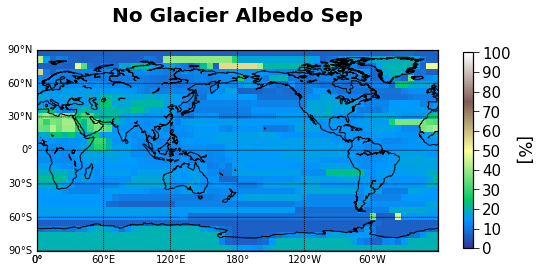

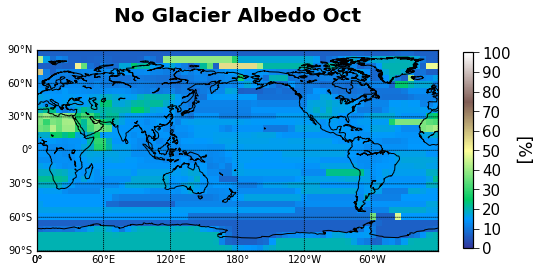

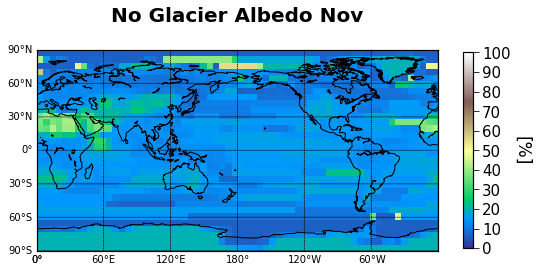

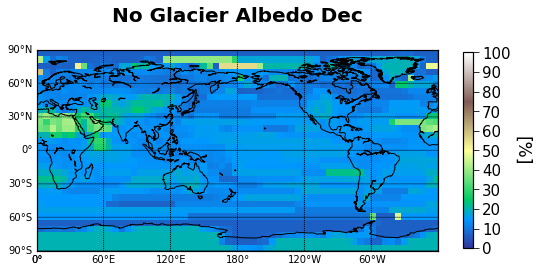

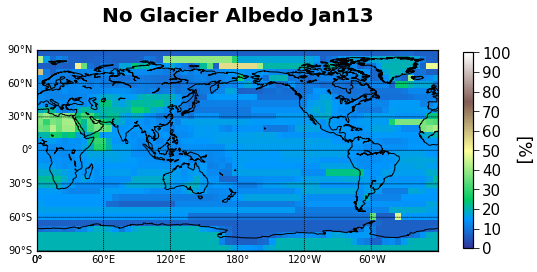

In [29]:
data174_res_mod=np.zeros((nlat,nlon))

with open(path+name_simulation+"N0"+str(nlat)+"_surf_0174_mod.sra",'w'):
    print("riscrivo file")
for i in range(0,int(len(data174)*4/tot)):

    data174_res=np.reshape(data174[i*int(tot/4)+1+i:(i+1)*int(tot/4)+1+i],[nlat,nlon])
    C=np.where(data232<0.05, data174_res, data172*0.2+(1-data172)*0.069)
    C1=np.where(C<0.6, C, data172*C+(1-data172)*0.069)
    Title="No Glacier Albedo "+month[i]
    graphycs_v(100*C1[::-1],Title,'cyl',plt.cm.get_cmap("terrain"),False,"[%]",0,100)
   
    C2=np.reshape(C1,[row1,4])
    with open(path+name_simulation+"N0"+str(nlat)+"_surf_0174_mod.sra",'a+') as f1:
        f1.write(str174)
        for k in range(0,len(C2)):
            for j in range(0,len(C2[k])):
                f1.write(inpt.format(C2[k][j]))
            f1.write("\n")

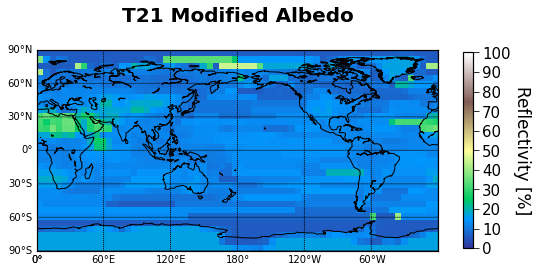

In [30]:
mean("N0"+str(nlat)+"_surf_0174_mod.sra",path+name_simulation,4,resolution+" Modified Albedo",0,100,"Reflectivity [%]",plt.cm.get_cmap("terrain"),const=100)